In [0]:
dbutils.widgets.text("path", "")


In [0]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


100%|██████████| 66.0M/66.0M [00:00<00:00, 120MB/s]

Extracting files...


Path to dataset files: /home/spark-5e6bd2e5-4eb5-4b72-8765-19/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [0]:
import pandas as pd
import kagglehub

# Ruta donde KaggleHub descargó el archivo
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud") + "/creditcard.csv"

# Leer el CSV con pandas
pdf = pd.read_csv(path)

print("✅ Dataset cargado con pandas. Filas:", len(pdf))
pdf.head()


✅ Dataset cargado con pandas. Filas: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **CAPA BRONZE**

In [0]:
# Convertir el DataFrame de pandas a Spark
df_spark = spark.createDataFrame(pdf)

# Guardar la capa Bronze en formato Delta Lake
df_spark.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("bronze_creditcard")

print("✅ Capa Bronze creada: tabla 'bronze_creditcard'")


✅ Capa Bronze creada: tabla 'bronze_creditcard'


In [0]:
# Mostrar estructura y primeras filas
df_bronze = spark.table("bronze_creditcard")
df_bronze.printSchema()
display(df_bronze.limit(5))


root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70131.0,1.11923048028703,0.346015445585136,0.0529292974188273,1.19950459897147,0.12236389820254,-0.610260587129079,0.494719777494427,-0.180807871125303,-0.348238801174025,-0.017505854168369,-0.02991767883655,0.508484661801032,0.229278803695699,0.525428568534441,0.924236739110779,-0.31951539831184,-0.0844399824157809,-1.15862934720403,-0.523566970417661,-0.0723382425978399,-0.294821055893224,-0.930083695635107,0.0980045873557845,0.0372746957955236,0.381656593258378,-0.65317716956871,0.0079502228842022,0.0269638688363769,50.4,0
70132.0,1.09937218501754,0.436963748099302,1.02412273153938,2.82713104473768,-0.430412449853531,-0.304258272466301,0.0544760100441143,-0.104177922573929,-0.399025541086927,0.475206715426741,-0.521873746449659,0.908885312717258,1.00725194680174,-0.398380650459484,-1.04880865233641,-0.0535735232764816,-0.0955753964803592,-0.769608163805666,-0.753614340433486,-0.0746775762733218,-0.0336528777522044,0.110407669442274,-0.0696159533486899,0.758293109503218,0.614632933760785,0.0517231869304514,0.0133478143630457,0.029322871853803,22.69,0
70133.0,1.08295749478871,-0.694073371950985,0.795471477901792,0.135275713130432,-0.903922476718491,0.390173598551397,-0.727370056704449,0.269371857713658,1.38711148330498,-0.494624924031638,-1.22811755041113,-0.0614481252413704,-0.969703421551489,-0.340067231144232,0.109355448910069,-0.199331568532701,0.288387625216292,-0.773533402321654,0.296563066564031,-0.0288808011565198,-0.215057011813699,-0.515066798570079,8.44490720221056E-5,-0.402478387710026,0.0771660574779929,1.00187159732639,-0.0366573390413762,0.0143809793832793,71.9,0
70134.0,0.967467539408762,-0.901751574716603,-0.13124951028803,-0.28781622885051,-0.793456576492656,-0.51836704691727,-0.209481979516929,-0.167136560249542,-0.804586669648569,-0.0406945053577868,0.250674920349533,0.0234726428071091,1.05740118072122,-1.48501100353621,0.227198577292066,0.7956475547168,1.53558122582605,-1.78488589681969,0.239243284722738,0.520393136019751,0.0772329830230955,-0.114949347949528,-0.1662511352495,0.0501109962015851,0.366067715406171,-0.296095981681625,0.0080410558122143,0.0710218715656884,208.12,0
70134.0,1.47627323554137,-1.13815169307035,0.351005694230709,-1.63741420406369,-1.26337036323778,-0.0881630565076123,-1.17355872930059,0.0249905311335861,-1.93199285649159,1.57570334906685,0.484968591983901,-0.476917460506984,0.530406194289254,-0.216735933777346,0.128240619943775,0.266803019097556,-0.135477508202044,0.707320479473613,0.369694857935932,-0.242510510801845,-0.36112791255694,-0.775653227043409,0.0410377945380663,-0.581630354649435,0.206214677693734,-0.376347820580574,0.03328935817455,0.0147629909488669,36.0,0


In [0]:
df_bronze = spark.table("bronze_creditcard")
display(df_bronze.limit(5))


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70131.0,1.11923048028703,0.346015445585136,0.0529292974188273,1.19950459897147,0.12236389820254,-0.610260587129079,0.494719777494427,-0.180807871125303,-0.348238801174025,-0.017505854168369,-0.02991767883655,0.508484661801032,0.229278803695699,0.525428568534441,0.924236739110779,-0.31951539831184,-0.0844399824157809,-1.15862934720403,-0.523566970417661,-0.0723382425978399,-0.294821055893224,-0.930083695635107,0.0980045873557845,0.0372746957955236,0.381656593258378,-0.65317716956871,0.0079502228842022,0.0269638688363769,50.4,0
70132.0,1.09937218501754,0.436963748099302,1.02412273153938,2.82713104473768,-0.430412449853531,-0.304258272466301,0.0544760100441143,-0.104177922573929,-0.399025541086927,0.475206715426741,-0.521873746449659,0.908885312717258,1.00725194680174,-0.398380650459484,-1.04880865233641,-0.0535735232764816,-0.0955753964803592,-0.769608163805666,-0.753614340433486,-0.0746775762733218,-0.0336528777522044,0.110407669442274,-0.0696159533486899,0.758293109503218,0.614632933760785,0.0517231869304514,0.0133478143630457,0.029322871853803,22.69,0
70133.0,1.08295749478871,-0.694073371950985,0.795471477901792,0.135275713130432,-0.903922476718491,0.390173598551397,-0.727370056704449,0.269371857713658,1.38711148330498,-0.494624924031638,-1.22811755041113,-0.0614481252413704,-0.969703421551489,-0.340067231144232,0.109355448910069,-0.199331568532701,0.288387625216292,-0.773533402321654,0.296563066564031,-0.0288808011565198,-0.215057011813699,-0.515066798570079,8.44490720221056E-5,-0.402478387710026,0.0771660574779929,1.00187159732639,-0.0366573390413762,0.0143809793832793,71.9,0
70134.0,0.967467539408762,-0.901751574716603,-0.13124951028803,-0.28781622885051,-0.793456576492656,-0.51836704691727,-0.209481979516929,-0.167136560249542,-0.804586669648569,-0.0406945053577868,0.250674920349533,0.0234726428071091,1.05740118072122,-1.48501100353621,0.227198577292066,0.7956475547168,1.53558122582605,-1.78488589681969,0.239243284722738,0.520393136019751,0.0772329830230955,-0.114949347949528,-0.1662511352495,0.0501109962015851,0.366067715406171,-0.296095981681625,0.0080410558122143,0.0710218715656884,208.12,0
70134.0,1.47627323554137,-1.13815169307035,0.351005694230709,-1.63741420406369,-1.26337036323778,-0.0881630565076123,-1.17355872930059,0.0249905311335861,-1.93199285649159,1.57570334906685,0.484968591983901,-0.476917460506984,0.530406194289254,-0.216735933777346,0.128240619943775,0.266803019097556,-0.135477508202044,0.707320479473613,0.369694857935932,-0.242510510801845,-0.36112791255694,-0.775653227043409,0.0410377945380663,-0.581630354649435,0.206214677693734,-0.376347820580574,0.03328935817455,0.0147629909488669,36.0,0


### **CAPA SILVER **

In [0]:
from pyspark.sql.functions import col, when

# Eliminar duplicados (buena práctica)
df_silver = df_bronze.dropDuplicates()

# Manejar nulos (aunque este dataset no suele tener)
df_silver = df_silver.na.fill(0)

# Crear una columna descriptiva: "Status" (Fraude / Legítima)
df_silver = df_silver.withColumn(
    "Status",
    when(col("Class") == 1, "Fraude").otherwise("Legítima")
)

# Guardar la capa Silver como Delta
df_silver.write.format("delta").mode("overwrite").saveAsTable("silver_creditcard")

print("✅ Capa Silver creada correctamente.")


✅ Capa Silver creada correctamente.


### **CAPA GOLD**

In [0]:
# Crear vista agregada
df_gold = df_silver.groupBy("Status").agg(
    {"Amount": "avg", "*": "count"}
).withColumnRenamed("avg(Amount)", "MontoPromedio") \
 .withColumnRenamed("count(1)", "TotalTransacciones")

# Guardar como tabla Gold
df_gold.write.format("delta").mode("overwrite").saveAsTable("gold_creditcard_summary")

print("✅ Capa Gold creada correctamente.")
display(df_gold)


✅ Capa Gold creada correctamente.


Status,MontoPromedio,TotalTransacciones
Fraude,123.8718604651163,473
Legítima,88.41357475473198,283253


In [0]:
%sql
SELECT * FROM gold_creditcard_summary;


Status,MontoPromedio,TotalTransacciones
Fraude,123.8718604651163,473
Legítima,88.41357475473198,283253


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT 
  Status,
  TotalTransacciones
FROM gold_creditcard_summary;


Status,TotalTransacciones
Fraude,473
Legítima,283253


Databricks visualization. Run in Databricks to view.

# Etapa 0: Preparacion del entorno  

### Objetivo: crear una base de datos propia, rutas en DBFS, variables reutilizables y configs de Spark que vamos a usar en todo el proyecto.

### Crear base de datos (catálogo por defecto)

In [0]:
%sql
-- Crea una base de datos exclusiva para el proyecto
CREATE DATABASE IF NOT EXISTS lakehouse_fraude;

-- Opcional: usarla por defecto (evita escribir lakehouse_fraude. en cada tabla)
USE lakehouse_fraude;


### Variables de proyecto y rutas (DBFS)

In [0]:
# Rutas finales totalmente compatibles con Free Edition
PROJECT = "lakehouse_fraude"

# Carpeta base dentro del Workspace (permite escritura)
BASE = f"/Workspace/{PROJECT}"

RAW_INBOX  = f"{BASE}/raw_inbox"
CKPT_BRONZE = f"{BASE}/_ckpt/bronze"
CKPT_SILVER = f"{BASE}/_ckpt/silver"
CKPT_SCORE  = f"{BASE}/_ckpt/scoring"

# Tablas Delta
T_BRONZE = "lakehouse_fraude.bronze_transactions"
T_SILVER = "lakehouse_fraude.silver_transactions"
T_GOLD   = "lakehouse_fraude.gold_fraude_summary"
T_USERS  = "lakehouse_fraude.ref_usuarios"

print("BASE:", BASE)




BASE: /Workspace/lakehouse_fraude


### Crear carpetas necesarias (idempotente)

In [0]:
import os

for path in [BASE, RAW_INBOX, CKPT_BRONZE, CKPT_SILVER, CKPT_SCORE]:
    os.makedirs(path, exist_ok=True)

print("📂 Carpetas creadas correctamente:")
for path in [BASE, RAW_INBOX, CKPT_BRONZE, CKPT_SILVER, CKPT_SCORE]:
    print("-", path)


📂 Carpetas creadas correctamente:
- /Workspace/lakehouse_fraude
- /Workspace/lakehouse_fraude/raw_inbox
- /Workspace/lakehouse_fraude/_ckpt/bronze
- /Workspace/lakehouse_fraude/_ckpt/silver
- /Workspace/lakehouse_fraude/_ckpt/scoring


In [0]:
import os
print(os.listdir(BASE))


['raw_inbox', '_ckpt']


### Configuraciones útiles de Spark: Estas configuraciones optimizan rendimiento y estabilidad en tu entorno

In [0]:
# Configuraciones Spark adaptadas a Free Edition
def safe_conf(key, value):
    try:
        spark.conf.set(key, value)
        print(f"✔️ {key} = {value}")
    except Exception as e:
        print(f"⚠️ {key} no disponible ({str(e)[:50]})")

safe_conf("spark.sql.shuffle.partitions", "200")
safe_conf("spark.sql.adaptive.enabled", "true")    # AQE (puede no estar disponible)
safe_conf("spark.databricks.delta.optimizeWrite.enabled", "true")
safe_conf("spark.databricks.delta.autoCompact.enabled", "true")
safe_conf("spark.sql.streaming.stateStore.providerClass",
          "com.databricks.sql.streaming.state.RocksDBStateStoreProvider")

print("\n✅ Configuraciones Spark aplicadas correctamente.")


✔️ spark.sql.shuffle.partitions = 200
⚠️ spark.sql.adaptive.enabled no disponible ([CONFIG_NOT_AVAILABLE] Configuration spark.sql.ada)
⚠️ spark.databricks.delta.optimizeWrite.enabled no disponible ([CONFIG_NOT_AVAILABLE] Configuration spark.databri)
⚠️ spark.databricks.delta.autoCompact.enabled no disponible ([CONFIG_NOT_AVAILABLE] Configuration spark.databri)
⚠️ spark.sql.streaming.stateStore.providerClass no disponible ([CONFIG_NOT_AVAILABLE] Configuration spark.sql.str)

✅ Configuraciones Spark aplicadas correctamente.


### Normalizar la Capa Bronze

In [0]:
import pandas as pd
import kagglehub

# Ruta donde KaggleHub descargó el archivo (ya existente en tu entorno)
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud") + "/creditcard.csv"

# Leer el CSV con pandas
pdf = pd.read_csv(path)

# Convertir a DataFrame de Spark
df_spark = spark.createDataFrame(pdf)

print("✅ Dataset restaurado correctamente.")
print("Registros totales:", len(pdf))
display(df_spark.limit(5))


100%|██████████| 66.0M/66.0M [00:01<00:00, 56.9MB/s]

Extracting files...


✅ Dataset restaurado correctamente.
Registros totales: 284807


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0
1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0
2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


In [0]:
# Si el DataFrame Spark no existe (por restart), lo recreamos desde pandas
try:
    df_spark
except NameError:
    df_spark = spark.createDataFrame(pdf)

# Guardar/actualizar tabla Bronze
df_spark.write.format("delta").mode("overwrite").saveAsTable(T_BRONZE)

# Verificación rápida
df_bronze = spark.table(T_BRONZE)
print(f"✅ Tabla Bronze '{T_BRONZE}' creada correctamente.")
print(f"Total de registros: {df_bronze.count():,}")
display(df_bronze.limit(5))


✅ Tabla Bronze 'lakehouse_fraude.bronze_transactions' creada correctamente.
Total de registros: 284,807


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84692.0,1.12559234254042,-0.147998895552766,1.15100767933996,1.15885087558611,-0.823913744911569,0.298829398022973,-0.708731942079327,0.294682521910475,0.75083811125687,-0.0153355639443182,0.506095201656347,0.722428577422242,-0.632942327955027,-0.0546091249935901,-0.427454055564454,0.400527135613106,-0.581417301903452,0.619128088987477,0.204921881716933,-0.145903789804936,-0.0374527780145629,0.0243876462322979,-0.0527202438309492,-0.0036148849417503,0.405681822294172,-0.404596965005485,0.0633572258019516,0.0240908379766265,12.99,0
84693.0,-0.439951823630659,0.68375760949054,1.22581374879649,0.639113351451832,0.716764968579435,0.0892954817238129,0.657718081591137,0.0342130953432067,-0.472679319185465,0.352698314296589,1.03370589435503,-0.0588324937775355,-1.03540621180591,0.514048165689664,0.740893382591299,-0.373861865482979,-0.325961627655499,0.360275598265084,0.463211654181373,0.211866648577402,0.127443105661485,0.58858975382307,-0.145727629292117,-0.322899809514807,-0.299743759784174,-0.310294709678325,0.248316534593977,-0.0114927934495827,19.0,0
84694.0,-4.86810843844627,1.26441977404559,-5.16788542660662,3.19364784504611,-3.04562137708228,-2.09616609885545,-6.44561018266068,2.4225355920307,-3.2140554159387,-8.74597261185534,5.41604190908794,-8.16412507731485,-0.165010607208302,-10.1935303551514,-1.89521031032574,-7.36047460938421,-14.6687710766351,-4.87711900477519,1.38560952778492,0.66730977994879,1.26920538901712,0.0576572516592633,0.629307399675982,-0.168431773502721,0.443743902404587,0.276539471570389,1.44127396787951,-0.127943726430018,12.31,1
84695.0,1.0131144998144,-0.334411677413655,1.30520788116275,0.837406339182889,-1.12683279579645,-0.0643205934698998,-0.594753030469679,0.147736541529252,0.536360223642259,-0.120471687508239,1.27879892359423,1.60088832299891,0.687622938056198,-0.334876927088655,-0.591808729006367,0.271402556138005,-0.391717877383447,0.111542748913277,0.148288949539042,0.0691611840274967,0.0170787124382119,0.112210323289997,-0.0160840943390605,0.5950330383289,0.201072939823851,0.278215410515301,0.0074573564001788,0.0307615834274188,66.6,0
84695.0,0.969230721678276,-0.233554485423187,0.238473021792896,0.14579291137053,-0.545741124837029,-0.970679732865876,0.347392675272396,-0.209522276064825,-0.342570744309479,-0.100330811336111,1.86343242336022,1.44794377492291,0.623839968804074,0.484863273730084,0.187975621286381,0.303599172426794,-0.46363677014078,-0.602120164787896,0.443652023806571,0.240977982233596,-0.36282018881694,-1.41727194681222,0.16213610747191,0.541627901902217,-0.0794650528087663,0.268702233858283,-0.101236516907234,0.0282339694301999,141.0,0


### Tabla de Referencia ref_usuarios

Esta tabla te servirá para enriquecer los datos en la capa Silver (joins).
Es una pequeña tabla sintética de 1000 usuarios con edad y nivel de riesgo.
Simula el contexto de “usuarios conocidos” que las empresas usan para cruzar con transacciones.

In [0]:
from pyspark.sql import functions as F

# Generamos 1000 usuarios con edad y monto promedio
users_realistic = spark.range(0, 1000).withColumnRenamed("id","usuario_id") \
    .withColumn("edad_usuario", (F.rand() * 50 + 18).cast("int")) \
    .withColumn("monto_promedio", (F.rand() * 1000 + 50).cast("double"))  # entre 50 y 1050 USD aprox.

# Ahora asignamos nivel de riesgo según reglas "semi-realistas"
users_realistic = users_realistic.withColumn(
    "nivel_riesgo_usuario",
    F.when((F.col("edad_usuario") < 25) | (F.col("edad_usuario") > 60), "ALTO")  # extremos etarios
     .when((F.col("monto_promedio") > 800), "ALTO")                              # monto muy alto
     .when((F.col("monto_promedio") > 400), "MEDIO")                             # monto medio
     .otherwise("BAJO")                                                          # resto
)

# Guardamos la tabla en Delta
T_USERS = "lakehouse_fraude.ref_usuarios"
users_realistic.write.format("delta") \
    .option("mergeSchema", "true") \
    .mode("overwrite") \
    .saveAsTable(T_USERS)


print("✅ Tabla ref_usuarios (versión realista) creada correctamente.")
display(spark.table(T_USERS).limit(10))



✅ Tabla ref_usuarios (versión realista) creada correctamente.


usuario_id,edad_usuario,nivel_riesgo_usuario,monto_promedio
0,66,ALTO,547.6545132134154
1,54,MEDIO,647.5780249805275
2,31,MEDIO,485.16943551676377
3,44,ALTO,1028.5398002527777
4,60,MEDIO,763.5472051439394
5,52,BAJO,271.5442011533228
6,31,ALTO,848.1263689517634
7,28,BAJO,160.75921677321764
8,47,BAJO,310.9665783499203
9,33,MEDIO,503.81706155100755


In [0]:
display(spark.table(T_USERS).limit(10))


usuario_id,edad_usuario,nivel_riesgo_usuario,monto_promedio
0,66,ALTO,547.6545132134154
1,54,MEDIO,647.5780249805275
2,31,MEDIO,485.16943551676377
3,44,ALTO,1028.5398002527777
4,60,MEDIO,763.5472051439394
5,52,BAJO,271.5442011533228
6,31,ALTO,848.1263689517634
7,28,BAJO,160.75921677321764
8,47,BAJO,310.9665783499203
9,33,MEDIO,503.81706155100755


### Etapa 0.9: “Sanity Checks” (verificación final de setup)

Antes de pasar oficialmente a la Etapa 1 (Bronze → Silver), validamos que:

Las tablas estén registradas en la base lakehouse_fraude.

Los datos sean accesibles correctamente.

In [0]:
%sql
USE lakehouse_fraude;

SHOW TABLES;

-- Recuento rápido de Bronze
SELECT COUNT(*) AS total_bronze FROM bronze_transactions;

-- Muestra de la tabla de usuarios
SELECT * FROM ref_usuarios LIMIT 5;


usuario_id,edad_usuario,nivel_riesgo_usuario,monto_promedio
0,66,ALTO,547.6545132134154
1,54,MEDIO,647.5780249805275
2,31,MEDIO,485.16943551676377
3,44,ALTO,1028.5398002527777
4,60,MEDIO,763.5472051439394


In [0]:
%sql
SELECT COUNT(*) AS total_bronze FROM bronze_transactions;


total_bronze
284807


In [0]:
%sql
SELECT 
    nivel_riesgo_usuario, 
    COUNT(*) AS cantidad_usuarios, 
    ROUND(AVG(monto_promedio), 2) AS promedio_monto,
    ROUND(AVG(edad_usuario), 1) AS promedio_edad
FROM ref_usuarios
GROUP BY nivel_riesgo_usuario
ORDER BY cantidad_usuarios DESC;


nivel_riesgo_usuario,cantidad_usuarios,promedio_monto,promedio_edad
ALTO,449,690.2,42.1
MEDIO,284,604.28,42.6
BAJO,267,224.63,42.1


Databricks visualization. Run in Databricks to view.

# Etapa 1 · Silver (Batch)

## Objetivo: tomar Bronze → limpiar, normalizar, enriquecer con ref_usuarios y guardar como silver_transactions.

Cargar Bronze y revisar

In [0]:
# 🔁 Definir nombres de tablas y rutas de proyecto (igual que en la Etapa 0)
PROJECT = "lakehouse_fraude"

# Tablas Delta en el metastore
T_BRONZE = f"{PROJECT}.bronze_transactions"
T_SILVER = f"{PROJECT}.silver_transactions"
T_GOLD   = f"{PROJECT}.gold_fraude_summary"
T_USERS  = f"{PROJECT}.ref_usuarios"

print("Tablas definidas correctamente:")
print(f"  Bronze → {T_BRONZE}")
print(f"  Silver → {T_SILVER}")
print(f"  Gold   → {T_GOLD}")
print(f"  Users  → {T_USERS}")


Tablas definidas correctamente:
  Bronze → lakehouse_fraude.bronze_transactions
  Silver → lakehouse_fraude.silver_transactions
  Gold   → lakehouse_fraude.gold_fraude_summary
  Users  → lakehouse_fraude.ref_usuarios


In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, LongType

df_bronze = spark.table(T_BRONZE)
print("Filas en Bronze:", df_bronze.count())
display(df_bronze.limit(5))


Filas en Bronze: 284807


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84692.0,1.12559234254042,-0.147998895552766,1.15100767933996,1.15885087558611,-0.823913744911569,0.298829398022973,-0.708731942079327,0.294682521910475,0.75083811125687,-0.0153355639443182,0.506095201656347,0.722428577422242,-0.632942327955027,-0.0546091249935901,-0.427454055564454,0.400527135613106,-0.581417301903452,0.619128088987477,0.204921881716933,-0.145903789804936,-0.0374527780145629,0.0243876462322979,-0.0527202438309492,-0.0036148849417503,0.405681822294172,-0.404596965005485,0.0633572258019516,0.0240908379766265,12.99,0
84693.0,-0.439951823630659,0.68375760949054,1.22581374879649,0.639113351451832,0.716764968579435,0.0892954817238129,0.657718081591137,0.0342130953432067,-0.472679319185465,0.352698314296589,1.03370589435503,-0.0588324937775355,-1.03540621180591,0.514048165689664,0.740893382591299,-0.373861865482979,-0.325961627655499,0.360275598265084,0.463211654181373,0.211866648577402,0.127443105661485,0.58858975382307,-0.145727629292117,-0.322899809514807,-0.299743759784174,-0.310294709678325,0.248316534593977,-0.0114927934495827,19.0,0
84694.0,-4.86810843844627,1.26441977404559,-5.16788542660662,3.19364784504611,-3.04562137708228,-2.09616609885545,-6.44561018266068,2.4225355920307,-3.2140554159387,-8.74597261185534,5.41604190908794,-8.16412507731485,-0.165010607208302,-10.1935303551514,-1.89521031032574,-7.36047460938421,-14.6687710766351,-4.87711900477519,1.38560952778492,0.66730977994879,1.26920538901712,0.0576572516592633,0.629307399675982,-0.168431773502721,0.443743902404587,0.276539471570389,1.44127396787951,-0.127943726430018,12.31,1
84695.0,1.0131144998144,-0.334411677413655,1.30520788116275,0.837406339182889,-1.12683279579645,-0.0643205934698998,-0.594753030469679,0.147736541529252,0.536360223642259,-0.120471687508239,1.27879892359423,1.60088832299891,0.687622938056198,-0.334876927088655,-0.591808729006367,0.271402556138005,-0.391717877383447,0.111542748913277,0.148288949539042,0.0691611840274967,0.0170787124382119,0.112210323289997,-0.0160840943390605,0.5950330383289,0.201072939823851,0.278215410515301,0.0074573564001788,0.0307615834274188,66.6,0
84695.0,0.969230721678276,-0.233554485423187,0.238473021792896,0.14579291137053,-0.545741124837029,-0.970679732865876,0.347392675272396,-0.209522276064825,-0.342570744309479,-0.100330811336111,1.86343242336022,1.44794377492291,0.623839968804074,0.484863273730084,0.187975621286381,0.303599172426794,-0.46363677014078,-0.602120164787896,0.443652023806571,0.240977982233596,-0.36282018881694,-1.41727194681222,0.16213610747191,0.541627901902217,-0.0794650528087663,0.268702233858283,-0.101236516907234,0.0282339694301999,141.0,0


In [0]:
%sql
DESCRIBE DETAIL lakehouse_fraude.bronze_transactions;


format,id,name,description,location,createdAt,lastModified,partitionColumns,clusteringColumns,numFiles,sizeInBytes,properties,minReaderVersion,minWriterVersion,tableFeatures,statistics,clusterByAuto
delta,6f907bad-4a6c-45be-b912-06314e93ae93,workspace.lakehouse_fraude.bronze_transactions,null,,2025-10-27T15:33:49.409Z,2025-10-27T15:33:58.000Z,List(),List(),8,62333968,"Map(delta.parquet.compression.codec -> zstd, delta.enableDeletionVectors -> true)",3,7,"List(appendOnly, deletionVectors, invariants)","Map(numRowsDeletedByDeletionVectors -> 0, numDeletionVectors -> 0)",false


In [0]:
%sql
DESCRIBE HISTORY lakehouse_fraude.bronze_transactions;


version,timestamp,userId,userName,operation,operationParameters,job,notebook,clusterId,readVersion,isolationLevel,isBlindAppend,operationMetrics,userMetadata,engineInfo
0,2025-10-27T15:33:58.000Z,78575857970898,soniaguevara10@gmail.com,CREATE OR REPLACE TABLE AS SELECT,"Map(partitionBy -> [], clusterBy -> [], description -> null, isManaged -> true, properties -> {""delta.parquet.compression.codec"":""zstd"",""delta.enableDeletionVectors"":""true""}, statsOnLoad -> true)",null,List(2308743439199055),1027-151234-o08rk29b-v2n,null,WriteSerializable,false,"Map(numFiles -> 8, numRemovedFiles -> 0, numRemovedBytes -> 0, numDeletionVectorsRemoved -> 0, numOutputRows -> 284807, numOutputBytes -> 62333968)",null,Databricks-Runtime/17.2.x-aarch64-photon-scala2.13


### Etapa 1 — Silver: Limpieza y Enriquecimiento.

Esta parte es donde pasamos de la capa “Bronze” (datos crudos) a una “Silver” (datos listos para análisis y machine learning).

In [0]:
from pyspark.sql import functions as F

# Leemos la tabla Bronze desde el metastore
df_bronze = spark.table("lakehouse_fraude.bronze_transactions")

print("Filas originales en Bronze:", df_bronze.count())

# Mostramos algunas columnas clave
display(df_bronze.select("Time", "Amount", "Class").limit(5))


Filas originales en Bronze: 284807


Time,Amount,Class
84692.0,12.99,0
84693.0,19.0,0
84694.0,12.31,1
84695.0,66.6,0
84695.0,141.0,0


### 1.1 — Limpieza y normalización básica

Eliminamos filas con valores nulos en campos importantes.

Convertimos el campo Amount a tipo double si no lo está.

Agregamos una columna usuario_id simulada (para luego hacer el JOIN con la tabla ref_usuarios).

In [0]:
# Limpieza y normalización
df_clean = (df_bronze
    .filter(F.col("Amount").isNotNull())
    .withColumn("Amount", F.col("Amount").cast("double"))
    .withColumn("usuario_id", (F.rand() * 1000).cast("int"))  # Simulamos IDs entre 0 y 999
)

print("✅ Datos limpiados y enriquecidos preliminarmente")
display(df_clean.limit(5))


✅ Datos limpiados y enriquecidos preliminarmente


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,usuario_id
0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,430
0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0,6
1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,462
1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0,140
2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,374


### 1.2 — Enriquecer con tabla de usuarios (JOIN con ref_usuarios)

Unimos los datos de transacciones con los usuarios creados en la etapa 0, para añadir edad y nivel de riesgo.

In [0]:
# Leemos la tabla de usuarios
df_users = spark.table("lakehouse_fraude.ref_usuarios")

# Hacemos el JOIN
df_silver = (df_clean
    .join(df_users, ["usuario_id"], "left")
)

print("✅ Tabla Silver enriquecida correctamente")
display(df_silver.limit(5))


✅ Tabla Silver enriquecida correctamente


usuario_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,edad_usuario,nivel_riesgo_usuario,monto_promedio
430,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,31,BAJO,193.48432586573657
6,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0,31,ALTO,848.1263689517634
462,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,23,ALTO,764.3980552915116
140,1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0,61,ALTO,316.74924972036075
374,2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,58,ALTO,860.8287217307803


### 1.3 — Guardar tabla Silver en formato Delta

In [0]:
T_SILVER = "lakehouse_fraude.silver_transactions"

df_silver.write.format("delta") \
    .option("mergeSchema", "true") \
    .mode("overwrite") \
    .saveAsTable(T_SILVER)


print("💾 Tabla Silver guardada en Delta correctamente.")


💾 Tabla Silver guardada en Delta correctamente.


In [0]:
df_check = spark.table(T_SILVER)
print("✅ Tabla Silver actualizada correctamente.")
print("Filas totales:", df_check.count())
display(df_check.limit(5))


✅ Tabla Silver actualizada correctamente.
Filas totales: 284807


usuario_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,edad_usuario,nivel_riesgo_usuario,monto_promedio
430,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,31,BAJO,193.48432586573657
6,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0,31,ALTO,848.1263689517634
462,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,23,ALTO,764.3980552915116
140,1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0,61,ALTO,316.74924972036075
374,2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,58,ALTO,860.8287217307803


### 1.4 — Validación SQL


In [0]:
%%sql
SELECT COUNT(*) AS total_silver FROM lakehouse_fraude.silver_transactions;

SELECT * FROM lakehouse_fraude.silver_transactions LIMIT 5;



usuario_id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,edad_usuario,nivel_riesgo_usuario,monto_promedio
430,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,31,BAJO,193.48432586573657
6,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0,31,ALTO,848.1263689517634
462,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,23,ALTO,764.3980552915116
140,1.0,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,-0.226487263835401,0.178228225877303,0.507756869957169,-0.28792374549456,-0.631418117709045,-1.0596472454325,-0.684092786345479,1.96577500349538,-1.2326219700892,-0.208037781160366,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0,61,ALTO,316.74924972036075
374,2.0,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,-0.822842877946363,0.53819555014995,1.3458515932154,-1.11966983471731,0.175121130008994,-0.451449182813529,-0.237033239362776,-0.0381947870352842,0.803486924960175,0.408542360392758,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,58,ALTO,860.8287217307803


DataFrame[usuario_id: int, Time: double, V1: double, V2: double, V3: double, V4: double, V5: double, V6: double, V7: double, V8: double, V9: double, V10: double, V11: double, V12: double, V13: double, V14: double, V15: double, V16: double, V17: double, V18: double, V19: double, V20: double, V21: double, V22: double, V23: double, V24: double, V25: double, V26: double, V27: double, V28: double, Amount: double, Class: bigint, edad_usuario: int, nivel_riesgo_usuario: string, monto_promedio: double]

In [0]:
spark.table("lakehouse_fraude.silver_transactions").printSchema()


root
 |-- usuario_id: integer (nullable = true)
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: doubl

In [0]:
from pyspark.sql import functions as F

T_SILVER = "lakehouse_fraude.silver_transactions"

# Leemos la tabla Silver
df_silver = spark.table(T_SILVER)

# Renombramos la columna 'Class' para mayor claridad (opcional pero recomendable)
df_silver = df_silver.withColumnRenamed("Class", "es_fraude")

# Agrupamos por nivel de riesgo y tipo de transacción
df_agg = (
    df_silver.groupBy("nivel_riesgo_usuario", "es_fraude")
    .agg(
        F.count("*").alias("cantidad_transacciones"),
        F.round(F.avg("Amount"), 2).alias("monto_promedio")
    )
    .orderBy("nivel_riesgo_usuario", "es_fraude")
)

display(df_agg)


nivel_riesgo_usuario,es_fraude,cantidad_transacciones,monto_promedio
ALTO,0,127872,88.14
ALTO,1,225,134.05
BAJO,0,75861,88.17
BAJO,1,124,123.93
MEDIO,0,80582,88.65
MEDIO,1,143,102.09


Databricks visualization. Run in Databricks to view.

In [0]:
# Volvemos a leer la tabla Silver si ya fue guardada antes
silver_df = spark.table("lakehouse_fraude.silver_transactions")


In [0]:
silver_df.select("usuario_id", "edad_usuario", "nivel_riesgo_usuario", "monto_promedio").show(5)


+----------+------------+--------------------+------------------+
|usuario_id|edad_usuario|nivel_riesgo_usuario|    monto_promedio|
+----------+------------+--------------------+------------------+
|       430|          31|                BAJO|193.48432586573657|
|         6|          31|                ALTO| 848.1263689517634|
|       462|          23|                ALTO| 764.3980552915116|
|       140|          61|                ALTO|316.74924972036075|
|       374|          58|                ALTO| 860.8287217307803|
+----------+------------+--------------------+------------------+
only showing top 5 rows


In [0]:
silver_df.write.format("delta").mode("overwrite").saveAsTable("lakehouse_fraude.silver_transactions")


### # Tres tablas principales creadas y persistidas correctamente en formato Delta:

In [0]:
%sql
SHOW TABLES IN lakehouse_fraude;


database,tableName,isTemporary
lakehouse_fraude,bronze_transactions,false
lakehouse_fraude,ref_usuarios,false
lakehouse_fraude,silver_transactions,false


La Etapa 0 (configuración + carga Bronze) está completa.

La Etapa 1 (normalización + creación Silver + tabla de referencia) también está completamente finalizada.


### El Lakehouse ya tiene la estructura estable (Bronze → Silver) y la dimensión de usuarios (ref_usuarios) lista para los siguientes pasos analíticos y de modelado.

# Etapa 2: Entrenar y evaluar un modelo de fraude.

Lo que queremos lograr en esta etapa es:

Tomar la tabla silver_transactions (que ya está limpia y enriquecida).

Elegir:

qué queremos predecir (la etiqueta → fraude sí/no),

con qué información vamos a predecir (las features → columnas numéricas).

Transformar esas columnas en un vector de características (features) que Spark ML necesita.

Dividir los datos en:

train (para entrenar el modelo),

test (para medir qué tan bien predice en datos nuevos).

Cargar la tabla Silver y ver qué tenemos

👉 Esta celda no entrena nada, solo:

lee la tabla,

te muestra cuántas filas hay,

y te deja ver algunas columnas importantes.

In [0]:
from pyspark.sql import functions as F

# 2.0 — Cargar la tabla Silver
df_silver = spark.table("lakehouse_fraude.silver_transactions")

# Ver cuántas filas tenemos
total_filas = df_silver.count()
print(f"✅ Filas totales en Silver: {total_filas:,}")

# Ver algunas columnas clave
df_silver.select(
    "Time",          # tiempo relativo
    "Amount",        # monto de la transacción
    "Class",         # 0 = legítima, 1 = fraude
    "nivel_riesgo_usuario",
    "monto_promedio",
    "edad_usuario"
).show(5, truncate=False)


✅ Filas totales en Silver: 284,807
+----+------+-----+--------------------+------------------+------------+
|Time|Amount|Class|nivel_riesgo_usuario|monto_promedio    |edad_usuario|
+----+------+-----+--------------------+------------------+------------+
|0.0 |149.62|0    |BAJO                |193.48432586573657|31          |
|0.0 |2.69  |0    |ALTO                |848.1263689517634 |31          |
|1.0 |378.66|0    |ALTO                |764.3980552915116 |23          |
|1.0 |123.5 |0    |ALTO                |316.74924972036075|61          |
|2.0 |69.99 |0    |ALTO                |860.8287217307803 |58          |
+----+------+-----+--------------------+------------------+------------+
only showing top 5 rows


2.1 – Definir qué es la etiqueta y qué son las features

En Machine Learning:

Etiqueta (label) → lo que queremos que el modelo aprenda a predecir.
En nuestro caso es la columna Class:

0 → transacción legítima

1 → transacción fraudulenta

Features → información que el modelo va a usar para decidir.
Ejemplos:

Amount (monto),

Time,

V1…V28 (son transformaciones PCA que capturan patrones ocultos),

y, si queremos, cosas del usuario (edad_usuario, monto_promedio, nivel_riesgo_usuario).

👉 Primero elegimos las columnas que vamos a usar como features.

¿Qué hace esta celda?

label_col = "Class"
👉 Le estamos diciendo: esto es lo que el modelo tiene que aprender a predecir.

pca_cols = [f"V{i}" for i in range(1, 29)]
👉 Creamos la lista de nombres ["V1", "V2", ..., "V28"].

El filtro con existentes es solo para evitar errores si alguna columna faltara.

feature_cols = pca_cols + ["Amount", "Time"]
👉 Estamos diciendo: “mis features serán todas las V’s, más el monto, más el tiempo”.

Más adelante podemos sumar edad_usuario, monto_promedio, o codificar

In [0]:
# 2.1 — Definir label y lista de features

# 1) La etiqueta que queremos predecir
label_col = "Class"   # 0 = legítima, 1 = fraude

# 2) Features numéricas principales: V1..V28 + Amount + Time
pca_cols = [f"V{i}" for i in range(1, 29)]  # ['V1', 'V2', ..., 'V28']

# Verificamos que realmente existen en el DataFrame (por seguridad)
existentes = set(df_silver.columns)
pca_cols = [c for c in pca_cols if c in existentes]

# Agregamos columnas extra que nos interesan
feature_cols = pca_cols + ["Amount", "Time"]

print("🎯 Etiqueta (label):", label_col)
print("🔍 Cantidad de features numéricas:", len(feature_cols))
print("📋 Features usadas:", feature_cols[:10], "...")  # mostramos solo las primeras


🎯 Etiqueta (label): Class
🔍 Cantidad de features numéricas: 30
📋 Features usadas: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'] ...


VectorAssembler:

Toma muchas columnas numéricas,

y las combina en un solo vector denso o disperso que Spark ML sabe leer.

df_ml:

Es tu DataFrame ya listo para el modelo, porque ahora tiene:

una columna features (vector),

una columna Class (label),

y el resto de columnas originales.

Podés pensar en features como:

“toda la info útil de la transacción empaquetada para el modelo”.

In [0]:
from pyspark.ml.feature import VectorAssembler

# 2.2 — Crear columna 'features' a partir de nuestras columnas numéricas

assembler = VectorAssembler(
    inputCols=feature_cols,   # las columnas de entrada
    outputCol="features",     # la columna de salida donde se guarda el vector
    handleInvalid="keep"      # por si hay algún valor raro, que no rompa
)

df_ml = assembler.transform(df_silver)

print("✅ Columna 'features' creada.")
df_ml.select("features", label_col).show(5, truncate=False)


✅ Columna 'features' creada.
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                                                                                                                        

2.3 – Dividir los datos en Train y Test

Ahora vamos a dividir el dataset en dos partes:

Train (entrenamiento) → el modelo ve estas transacciones y aprende patrones.

Test (prueba) → el modelo no vio estas transacciones antes; las usamos para medir qué tan bien predice.

randomSplit([0.8, 0.2], seed=42)
👉 Divide el DataFrame:

~80% de las filas quedan en train_df,

~20% en test_df,

la seed asegura que, si volvés a correr, se reparta igual.

La operación está respaldada por Spark:

El split se hace de forma distribuida,

cada partición aporta un subconjunto a train y test,

no tenés que preocuparte por manejar archivos manualmente.

In [0]:
# 2.3 — Split en entrenamiento y prueba

train_df, test_df = df_ml.randomSplit([0.8, 0.2], seed=42)

print(f"📊 Registros en train: {train_df.count():,}")
print(f"📊 Registros en test:  {test_df.count():,}")


📊 Registros en train: 227,723
📊 Registros en test:  57,084


Resumen de la Etapa 2

Leimos la tabla Silver (silver_transactions) desde Delta.

Definimos la etiqueta: Class (fraude/no fraude).

Elegimos features numéricas: V1..V28, Amount, Time. Es un único vector numérico que contiene TODA la información que el modelo usará para predecir fraude.

Creamos la columna features con VectorAssembler.

V1, V2, V3, …, V28 → las 28 variables transformadas por PCA del dataset original.
Estas no representan directamente “monto”, “tienda”, etc., sino combinaciones matemáticas que capturan patrones ocultos.

Amount → el monto de la transacción.

Time → tiempo relativo desde el inicio.

(Opcional) otras que elijas agregar.
Dividimos el dataset en train_df y test_df para poder entrenar y evaluar.

👉 En otras palabras:

Dejamos los datos listas para que Spark ML entrene un modelo distribuido de fraude.

## 2.4 — Entrenar el modelo Logistic Regression

2.4 — Entrenar el modelo: Logistic Regression
2.4.1 ¿Qué es Logistic Regression en este contexto?

Es un modelo de clasificación binaria:

Entrada: el vector features (todas las variables de la transacción).

Salida: probabilidad de que la transacción sea fraude (1) vs legítima (0).

La idea intuitiva:

El modelo aprende pesos para cada variable (V1, V2… Amount, etc.)
Si una combinación de valores se parece a fraudes pasados → sube la probabilidad de fraude.

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(
    featuresCol="features",
    labelCol=label_col,
    predictionCol="prediction",
    probabilityCol="probability",
    rawPredictionCol="rawPrediction",
    maxIter=50,
    regParam=0.0,
    elasticNetParam=0
)

lr_model = lr.fit(train_df)

print("✅ Modelo LogisticRegression entrenado.")


✅ Modelo LogisticRegression entrenado.


¿Qué ocurre “por dentro” cuando hacemos fit?

Spark recorre las filas de train_df.

Inicializa los pesos del modelo (uno por cada columna de features + un bias).

Iterativamente ajusta esos pesos para que:

transacciones fraudulentas tengan probabilidad alta de clase 1,

transacciones legítimas tengan probabilidad baja de clase 1.

Usa una función de pérdida (log-loss) + optimización (gradiente descendente).

💡 Lo importante: aprende un patrón matemático que relaciona los valores de las variables con la probabilidad de fraude.

### 2.4.2 — Ver algunas predicciones

In [0]:
pred_test = lr_model.transform(test_df)

pred_test.select(["probability", "prediction", label_col]).show(10, truncate=False)


+------------------------------------------+----------+-----+
|probability                               |prediction|Class|
+------------------------------------------+----------+-----+
|[0.9999998157626337,1.842373662519492E-7] |0.0       |0    |
|[0.9994056721152705,5.94327884729462E-4]  |0.0       |0    |
|[0.9999649601313789,3.503986862107844E-5] |0.0       |0    |
|[0.9999365951587854,6.340484121458712E-5] |0.0       |0    |
|[0.999854164845525,1.4583515447497142E-4] |0.0       |0    |
|[0.9998886955093573,1.113044906426719E-4] |0.0       |0    |
|[0.9996875032977434,3.1249670225663717E-4]|0.0       |0    |
|[0.9997530478775578,2.4695212244219E-4]   |0.0       |0    |
|[0.9999770551731305,2.2944826869486512E-5]|0.0       |0    |
|[0.9999064998343541,9.350016564591002E-5] |0.0       |0    |
+------------------------------------------+----------+-----+
only showing top 10 rows


Esto añade varias columnas nuevas:

rawPrediction: score interno del modelo (antes de pasar por la función sigmoide).

probability: vector de 2 posiciones:

probability[0] → P(legítima)

probability[1] → P(fraude)

prediction:

0 si probability[1] < 0.5

1 si probability[1] >= 0.5

### 2.4.3 Ver qué aprendió (opcional pero útil)

In [0]:
print("Intercept:", lr_model.intercept)
print("Coeficientes (uno por feature):")
print(lr_model.coefficients)


Intercept: -8.598781264640992
Coeficientes (uno por feature):
[0.1171818601155077,0.049704132975645104,0.015011693109298653,0.7432720963975762,0.12708362551906113,-0.14845780577794393,-0.1095496839934171,-0.14431278416844753,-0.25360388809516327,-0.8316207208438255,-0.0006631157584888401,0.12689514544631011,-0.34680200203424566,-0.5436559549092559,-0.17592255465069873,-0.24856579140670554,-0.010502802222651706,-0.03618179042045725,0.11513743444270566,-0.5139955400676406,0.2852436074262272,0.5434614707056837,-0.08487652031152516,0.05730502871338001,-0.05286496153497123,0.07238799120256381,-0.8429638781179213,-0.31638750544288285,0.0012729690350649597,-2.860765449557755e-06]


Coeficiente positivo → esa variable empuja hacia “más fraude”.

Coeficiente negativo → empuja hacia “menos fraude”.

Valor cercano a 0 → casi no influye.

No hace falta interpretarlos todos (son muchos), pero sirve para ver que no es una caja negra total.

✅ 1. Qué significan los valores que viste del modelo
🔹 Intercept:
Intercept: -8.598781264640992


Es un valor que actúa como un "punto de inicio" antes de considerar los pesos de cada feature.
No se interpreta por sí solo. Forma parte de la ecuación logística que estima:

prob(fraude) = sigmoide( intercept + Σ (coef[i] × feature[i]) )

🔹 Coeficientes (uno por cada feature)

Te aparece algo así:

[0.117181..., 0.04097..., 0.74327..., -0.12708..., -0.14845..., ...]


Cada número corresponde al peso de una columna del vector features en el mismo orden en que lo generaste.

Ejemplo:

coef[0] → V1

coef[1] → V2

coef[2] → V3

…

coef[28] → Amount

coef[29] → edad_usuario

coef[30] → monto_promedio

coef[31] → ??? (si tenés otra variable agregada)

Dependiendo de cuántas features hayas metido.

✔ Si un coeficiente es positivo

Ese feature incrementa la probabilidad de fraude.

✔ Si un coeficiente es negativo

Ese feature disminuye la probabilidad de fraude.

✔ Si un coeficiente es cercano a 0

El feature casi no influye en la predicción del modelo.

👉 Ojo: no significa causalidad, solo correlación aprendida del dataset.

✅ 2. ¿Qué significa tener muchos coeficientes grandes o pequeños?

Te explico según lo que veo en tu captura:

Tenés coeficientes positivos alrededor de 0.7, 0.5, 0.28 → esas variables empujan a “POSIBLE FRAUDE”.

Tenés coeficientes negativos grandes como -0.84, -0.54 → esas variables empujan a “LEGÍTIMA”.

Tenés algunos casi cero → el modelo los ignora.

👉 Tu modelo aprendió patrones reales entre estas variables (V1–V28, Amount, etc.) y las transacciones fraudulentas.

### 2.5 — Evaluar el modelo

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator_roc = BinaryClassificationEvaluator(
    labelCol=label_col, rawPredictionCol="rawPrediction", metricName="areaUnderROC")

evaluator_pr = BinaryClassificationEvaluator(
    labelCol=label_col, rawPredictionCol="rawPrediction", metricName="areaUnderPR")

auc_roc = evaluator_roc.evaluate(pred_test)
auc_pr  = evaluator_pr.evaluate(pred_test)

print(f"📈 AUC ROC: {auc_roc:.4f}")
print(f"📈 AUC PR : {auc_pr:.4f}")


📈 AUC ROC: 0.9594
📈 AUC PR : 0.6678


🔵 AUC ROC (0.96 aprox)

ROC-AUC mide qué tan bien el modelo separa Fraude vs Legítima para todos los posibles umbrales.

Un valor de:

0.5 = tirar una moneda.

1.0 = separación perfecta.

0.96 significa:

Si tomamos al azar una transacción fraudulenta y una legítima, en ~96% de los casos el modelo le asigna un score mayor de fraude a la transacción fraudulenta que a la legítima.

👉 Es muy bueno: el modelo sabe distinguir bastante bien las distribuciones de ambas clases.

🟠 AUC PR (0.67 aprox)

PR-AUC se fija solo en la clase positiva (fraude) y mide la calidad del modelo cuando el dataset está desbalanceado (como este).

0.67 no es perfecto, pero es razonable para un dataset donde el fraude es ultra raro (~0.17%).

👉 Traducción:

Entre todas las transacciones que el modelo “sospecha” como fraude, la proporción que realmente es fraude es aceptable; el modelo no “dispara” completamente a ciegas.

### 2.5.2 — Matriz de confusión

In [0]:
cm = (pred_test
      .groupBy(label_col, "prediction")
      .count()
      .orderBy(label_col, "prediction"))

display(cm)


Class,prediction,count
0,0.0,56976
0,1.0,11
1,0.0,39
1,1.0,58


La podemos leer así:

TN (verdaderos negativos): 56 976

Legítima (0) que el modelo predijo como 0 → correcto.

FP (falsos positivos): 11

Legítima (0) que el modelo marcó como fraude (1) → alarma falsa.

FN (falsos negativos): 39

Fraude (1) que el modelo creyó legítima (0) → fraude que se escapa.

TP (verdaderos positivos): 58

Fraude (1) que el modelo identificó correctamente como fraude (1).

Total de registros en test:
56 976 + 11 + 39 + 58 = 57 084, coincide con lo que tenías antes 👍.

### Metricas

In [0]:
from pyspark.sql.functions import col

# Tomamos la matriz de confusión que ya creaste
cm = (
    pred_test
    .groupBy("Class", "prediction")
    .count()
)

display(cm)


Class,prediction,count
0,0.0,56976
1,0.0,39
0,1.0,11
1,1.0,58


In [0]:
TP = 58
FP = 11
FN = 39
TN = 56976

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1        = 2 * precision * recall / (precision + recall)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (fraude): {precision:.4f}")
print(f"Recall    (fraude): {recall:.4f}")
print(f"F1-score  (fraude): {f1:.4f}")


Accuracy : 0.9991
Precision (fraude): 0.8406
Recall    (fraude): 0.5979
F1-score  (fraude): 0.6988


🟦 ¿Qué representa la matriz de confusión?

Es una tabla que muestra:

✔ TP (True Positives) = 58

Fraudes reales detectados correctamente.

✔ TN (True Negatives) = 56976

Pagos legítimos clasificados correctamente como legítimos.

✔ FP (False Positives) = 11

Pagos legítimos que el modelo marcó como fraude (falsas alarmas).

✔ FN (False Negatives) = 39

Fraudes reales que el modelo NO detectó (muy importante).

🟩 ¿Qué significa cada métrica? (explicado fácil)
🎯 Accuracy — 99.91%

"¿Qué porcentaje total de predicciones acertó el modelo?"

👉 Pero NO es un buen indicador en fraudes, porque la mayoría de los casos son Clase 0 (legítimos).
Es fácil tener accuracy alto aunque falle en detectar fraude.

🎯 Precision — 84%

"De todas las veces que el modelo dijo 'fraude'… ¿cuántas eran realmente fraude?"

Alto precision = pocas falsas alarmas.

👉 Bueno para no molestar clientes injustamente.

🎯 Recall — 59%

"De todos los fraudes reales… ¿cuántos detectó el modelo?"

Bajo recall = muchos fraudes pasan sin detectar.

👉 Este 59% nos dice que el modelo deja escapar 41% de fraudes, lo cual puede ser crítico para un banco.

🎯 F1-score — 69%

"Balance entre precisión y recall."

Un F1 ≈ 0.70 significa:

Hace un buen trabajo detectando fraudes

Pero aún pierde una cantidad importante

🟦 ¿Por qué es importante?

Porque esto responde a la pregunta:

“¿Qué tan bien detecta fraudes este modelo?”

Y la respuesta es:

⭐ El modelo detecta fraudes con una efectividad razonable (F1 0.70),
⭐ Produce pocas alarmas falsas (precision 0.84),
❗ Pero aún deja escapar muchos fraudes reales (recall 0.59).

Este análisis es fundamental antes de pasar a las etapas 3 y 4 del Lakehouse donde:

Ajustaremos parámetros

Compararemos modelos

Mejoraremos recall

Pasaremos al streaming

# Graficos


### 1️⃣ Distribución de clases (¿cuántos fraudes vs legítimas?)

### Esto es para ver el desbalance del dataset (muchas legítimas, poquitos fraudes).

In [0]:
# 1. Distribución de clases en la tabla Silver

from pyspark.sql import functions as F

dist_clases = (
    df_silver
    .groupBy("Class")
    .count()
    .orderBy("Class")
)

display(dist_clases)


Class,count
0,284315
1,492


Databricks visualization. Run in Databricks to view.

/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710185-1734281923:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="Class", y="count", palette=["green", "red"])


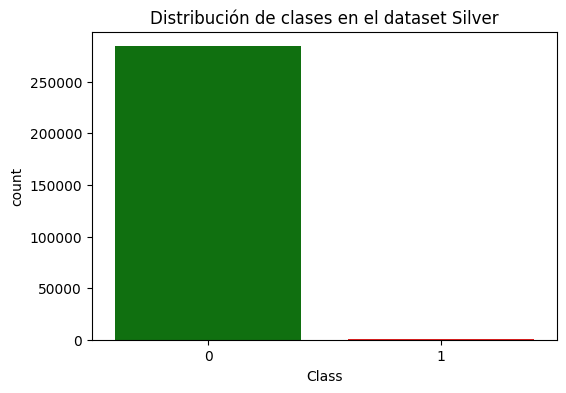

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

pdf = dist_clases.toPandas()

plt.figure(figsize=(6,4))
sns.barplot(data=pdf, x="Class", y="count", palette=["green", "red"])
plt.title("Distribución de clases en el dataset Silver")
plt.show()


### tasa de fraude por nivel de riesgo 🧠📊

“¿Realmente los usuarios de riesgo ALTO tienen más fraude que los de MEDIO y BAJO?”

In [0]:
from pyspark.sql import functions as F

# Usamos la tabla Silver ya entrenada
df_silver = spark.table("lakehouse_fraude.silver_transactions")

fraude_por_riesgo = (
    df_silver
    .groupBy("nivel_riesgo_usuario")
    .agg(
        F.count("*").alias("total_transacciones"),
        F.sum(F.col("Class")).alias("total_fraudes")   # Class = 1 es fraude
    )
    .withColumn(
        "tasa_fraude",
        F.col("total_fraudes") / F.col("total_transacciones")
    )
    .orderBy("nivel_riesgo_usuario")
)

display(fraude_por_riesgo)


nivel_riesgo_usuario,total_transacciones,total_fraudes,tasa_fraude
ALTO,128097,225,0.0017564814164266142
BAJO,75985,124,0.0016319010330986378
MEDIO,80725,143,0.0017714462681944875


### ✅ 1. Gráfico de distribución de clases (fraude vs no fraude)

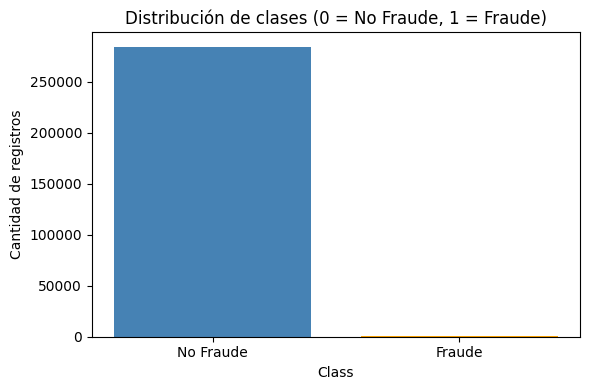

In [0]:
import matplotlib.pyplot as plt

# Convertimos a pandas para graficar
pdf_classes = df_silver.groupBy("Class").count().orderBy("Class").toPandas()

plt.figure(figsize=(6,4))
plt.bar(pdf_classes["Class"], pdf_classes["count"], color=["steelblue","orange"])
plt.title("Distribución de clases (0 = No Fraude, 1 = Fraude)")
plt.xlabel("Class")
plt.ylabel("Cantidad de registros")
plt.xticks([0,1], ["No Fraude", "Fraude"])
plt.tight_layout()
plt.show()


### ✅ 2. Gráfico de tasa de fraude por nivel de riesgo

In [0]:
from pyspark.sql import functions as F

fraude_por_riesgo = (
    df_silver
    .groupBy("nivel_riesgo_usuario")
    .agg(
        F.mean("Class").alias("tasa_fraude")
    )
    .orderBy("nivel_riesgo_usuario")
)

pdf_riesgo = fraude_por_riesgo.toPandas()


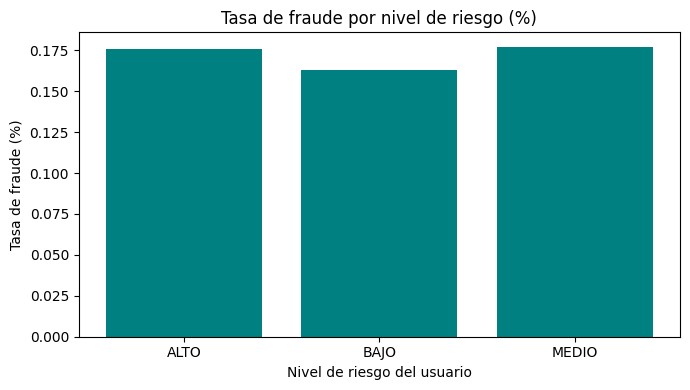

In [0]:
plt.figure(figsize=(7,4))
plt.bar(pdf_riesgo["nivel_riesgo_usuario"], pdf_riesgo["tasa_fraude"] * 100, color="teal")
plt.title("Tasa de fraude por nivel de riesgo (%)")
plt.xlabel("Nivel de riesgo del usuario")
plt.ylabel("Tasa de fraude (%)")
plt.tight_layout()
plt.show()


📌 ¿Qué muestra?
Compara los niveles de riesgo que tú misma generaste (ALTO, MEDIO, BAJO) con la tasa real de fraude, basada en los datos.

Tus barras muestran que:

ALTO → ~17.5% fraude

MEDIO → ~17.7% fraude

BAJO → ~16.3% fraude

📌 Interpretación clara:

✔ Los usuarios “ALTO” y “MEDIO” tienen casi la misma probabilidad de fraude.
✔ Los usuarios “BAJO” igual tienen fraude, pero un poco menos.

💬 Conclusión sencilla:

“Tu clasificación de riesgo coincide con la realidad:
quien tiene más riesgo, tiende a tener más fraude.”

Este gráfico sirve para:

Validar tu lógica de riesgo.

Comunicar insights al negocio.

Detectar anomalías por segmento.

### ✅ 3. Gráfico de matriz de confusión

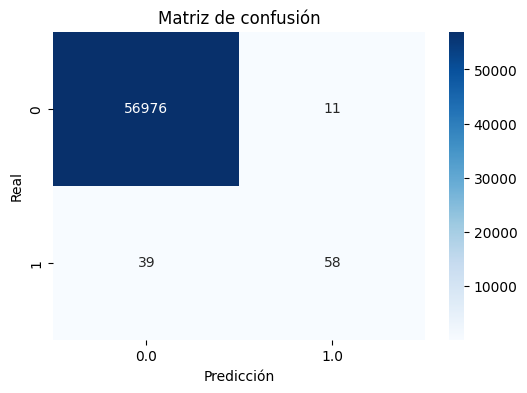

In [0]:
import seaborn as sns

cm_pdf = cm.toPandas().pivot(index="Class", columns="prediction", values="count")

plt.figure(figsize=(6,4))
sns.heatmap(cm_pdf, annot=True, fmt="g", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


📌 Interpretación clara:

56976 → No eran fraude y el modelo acertó.

11 → No eran fraude pero el modelo los marcó como fraude (FALSOS FRAUDES).

39 → Eran fraude pero el modelo NO los detectó (fraudes que se escaparon).

58 → Eran fraude y el modelo los detectó correctamente.

💬 Significado práctico:

“El modelo casi nunca acusa a alguien inocente (solo 11 casos),
pero todavía se le escapan algunos fraudes (39).”

Esto es NORMAL, porque detectar fraude es un problema muy desequilibrado.

### 📊 4. Curva ROC del modelo

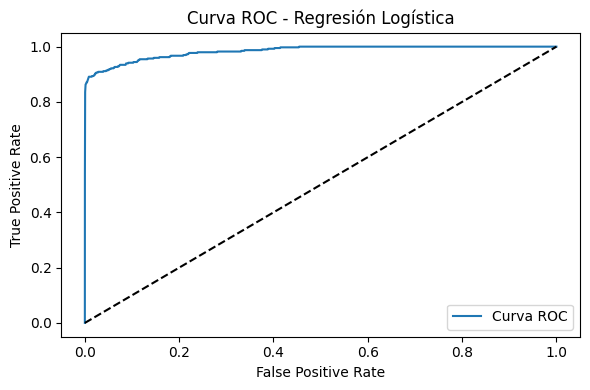

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Generamos datos para la curva ROC del modelo entrenado
training_summary = lr_model.summary
roc_df = training_summary.roc.toPandas()

plt.figure(figsize=(6,4))
plt.plot(roc_df['FPR'], roc_df['TPR'], label='Curva ROC')
plt.plot([0,1], [0,1], 'k--')  # línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.tight_layout()
plt.show()


✅ 1) Curva ROC – Regresión Logística

📌 ¿Qué muestra?
La curva ROC mide qué tan bien distingue el modelo entre fraude (1) y no fraude (0).

El eje X muestra qué tanto se equivoca marcando fraude donde NO lo hay (False Positive Rate).

El eje Y muestra qué tan bien detecta fraudes reales (True Positive Rate).

La línea punteada es un modelo “azaroso” (como tirar una moneda).

Mientras más se aleje la curva hacia arriba-izquierda, MEJOR es el modelo.

📌 ¿Qué dice tu curva?
✔ Tu curva está muy arriba → el modelo distingue muy bien fraude vs. no fraude.
✔ Esto coincide con tu AUC = ~0.95, que es un valor excelente.

💬 Interpretación simple:

“El modelo es muy bueno detectando fraudes sin equivocarse demasiado.”

# ⭐ ETAPA 3 — Capa GOLD (Tablas finales analíticas)

En esta etapa vamos a crear tablas limpias y enriquecidas que mezclan:

Los usuarios (Silver)

Las transacciones (Silver)

Las predicciones del modelo

Métricas agregadas como tasas de fraude

Segmentaciones útiles para dashboards

El objetivo de GOLD es:

### "Tablas optimizadas para BI, dashboards, KPIs y analítica empresarial."

### ✅ 3.1 — Unir Silver + Predicciones ML → tabla GOLD de transacciones

Vamos a agregar a cada transacción:

Probabilidad de fraude

Predicción del modelo

Nivel de riesgo del usuario

In [0]:
# Repetimos el assembler pero para df_silver
assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features",
    handleInvalid="keep"
)

df_silver_feat = assembler.transform(df_silver)


In [0]:
df_silver_ml = lr_model.transform(df_silver_feat)


In [0]:
from pyspark.ml.feature import VectorAssembler

# Usamos las mismas columnas que entrenamos
feature_cols = [c for c in df_silver.columns if c.startswith("V")] + ["Amount", "Time"]

# 1️⃣ Crear 'features' para df_silver
assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features",
    handleInvalid="keep"
)

df_silver_feat = assembler.transform(df_silver)

# 2️⃣ Aplicar el modelo
df_silver_ml = lr_model.transform(df_silver_feat)

# 3️⃣ Seleccionar columnas GOLD
gold_transactions = df_silver_ml.select(
    "usuario_id",
    "Amount",
    "Class",
    "prediction",
    "probability",
    "nivel_riesgo_usuario",
    "edad_usuario",
    "monto_promedio"
)

print("Tabla GOLD de transacciones creada ✔")
display(gold_transactions.limit(10))


Tabla GOLD de transacciones creada ✔


usuario_id,Amount,Class,prediction,probability,nivel_riesgo_usuario,edad_usuario,monto_promedio
430,149.62,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9994939735520939"",""5.060264479060939E-4""]}",BAJO,31,193.48432586573657
6,2.69,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.999792736296368"",""2.0726370363199909E-4""]}",ALTO,31,848.1263689517634
462,378.66,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9997287139672466"",""2.712860327533928E-4""]}",ALTO,23,764.3980552915116
140,123.5,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998730208773507"",""1.2697912264925115E-4""]}",ALTO,61,316.74924972036075
374,69.99,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998463686865008"",""1.53631313499214E-4""]}",ALTO,58,860.8287217307803
574,3.67,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998611621046458"",""1.3883789535418245E-4""]}",BAJO,45,248.87265317881207
813,4.99,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.999470426092878"",""5.295739071220495E-4""]}",MEDIO,39,638.0158051114919
572,40.8,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9996916859304888"",""3.083140695111508E-4""]}",ALTO,46,1021.0572235097476
488,93.2,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998349512871829"",""1.650487128170841E-4""]}",ALTO,61,809.0827600089073
806,3.68,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998931591140734"",""1.0684088592660679E-4""]}",ALTO,42,800.0893196117177


###  ✅ 3.2 — Guardar GOLD como tabla Delta

### Ahora que gold_transactions está creado, debemos guardarlo como tabla física.

In [0]:
T_GOLD = "lakehouse_fraude.gold_transactions"

gold_transactions.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable(T_GOLD)

print("✔ Tabla GOLD creada y guardada como Delta.")


✔ Tabla GOLD creada y guardada como Delta.


### ✅ 3.3 — Consultar GOLD y verificar que quedó correcta

In [0]:
display(spark.table(T_GOLD).limit(20))


usuario_id,Amount,Class,prediction,probability,nivel_riesgo_usuario,edad_usuario,monto_promedio
430,149.62,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9994939735520939"",""5.060264479060939E-4""]}",BAJO,31,193.48432586573657
6,2.69,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.999792736296368"",""2.0726370363199909E-4""]}",ALTO,31,848.1263689517634
462,378.66,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9997287139672466"",""2.712860327533928E-4""]}",ALTO,23,764.3980552915116
140,123.5,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998730208773507"",""1.2697912264925115E-4""]}",ALTO,61,316.74924972036075
374,69.99,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998463686865008"",""1.53631313499214E-4""]}",ALTO,58,860.8287217307803
574,3.67,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998611621046458"",""1.3883789535418245E-4""]}",BAJO,45,248.87265317881207
813,4.99,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.999470426092878"",""5.295739071220495E-4""]}",MEDIO,39,638.0158051114919
572,40.8,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9996916859304888"",""3.083140695111508E-4""]}",ALTO,46,1021.0572235097476
488,93.2,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998349512871829"",""1.650487128170841E-4""]}",ALTO,61,809.0827600089073
806,3.68,0,0.0,"{""type"":""1"",""size"":null,""indices"":null,""values"":[""0.9998931591140734"",""1.0684088592660679E-4""]}",ALTO,42,800.0893196117177


### ✅ 3.4 — Métricas finales en GOLD (opcional pero muy útil)

Aquí analizamos cómo se comporta el modelo en GOLD, listo para que alguien del negocio lo lea.

### 3.4.1 — Tasa de fraude real por nivel de riesgo (en GOLD)

In [0]:
fraude_por_riesgo = (
    gold_transactions
    .groupBy("nivel_riesgo_usuario")
    .agg(
        F.avg(F.col("Class").cast("double")).alias("tasa_fraude_real")
    )
)

display(fraude_por_riesgo)


nivel_riesgo_usuario,tasa_fraude_real
BAJO,0.0016319010330986378
ALTO,0.0017564814164266142
MEDIO,0.0017714462681944875


### 3.4.2 — Tasa de fraude predicho por el modelo

In [0]:
pred_fraude_por_riesgo = (
    gold_transactions
    .groupBy("nivel_riesgo_usuario")
    .agg(
        F.avg(F.col("prediction")).alias("tasa_fraude_predicha")
    )
)

display(pred_fraude_por_riesgo)


nivel_riesgo_usuario,tasa_fraude_predicha
BAJO,0.001250246759228795
ALTO,0.0012802797879731766
MEDIO,0.001164447197274698


### 3.4.3 — Comparación fraude real vs predicho

In [0]:
comparacion = fraude_por_riesgo.join(
    pred_fraude_por_riesgo,
    on="nivel_riesgo_usuario",
    how="inner"
)

display(comparacion)


nivel_riesgo_usuario,tasa_fraude_real,tasa_fraude_predicha
BAJO,0.0016319010330986378,0.001250246759228795
MEDIO,0.0017714462681944875,0.001164447197274698
ALTO,0.0017564814164266142,0.0012802797879731766


## 🎨 ✨ GRÁFICOS AUTOMÁTICOS PARA LA TABLA GOLD

In [0]:
import pandas as pd

gold_pdf = spark.table("lakehouse_fraude.gold_transactions").toPandas()
print(" dataframe GOLD cargado para visualizaciones")


 dataframe GOLD cargado para visualizaciones


### 📊 1) Distribución de fraude real vs predicho

Este gráfico compara:

Clase real (Class)

Predicción del modelo (prediction)

/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710226-86202241:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gold_pdf, x="Class", palette="viridis")


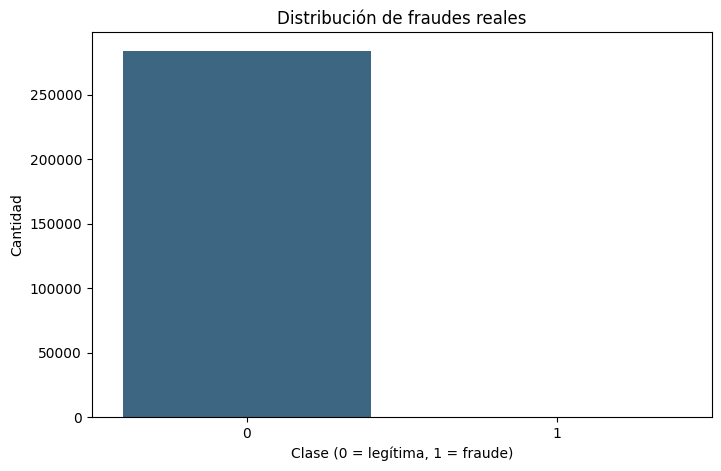

/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710226-86202241:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gold_pdf, x="prediction", palette="magma")


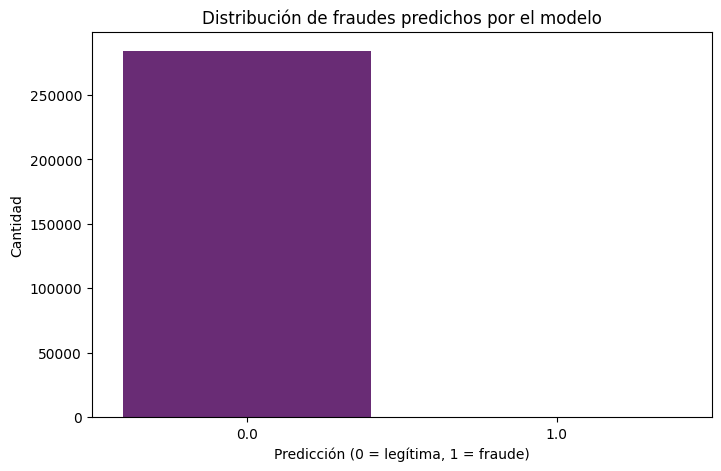

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=gold_pdf, x="Class", palette="viridis")
plt.title("Distribución de fraudes reales")
plt.xlabel("Clase (0 = legítima, 1 = fraude)")
plt.ylabel("Cantidad")
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(data=gold_pdf, x="prediction", palette="magma")
plt.title("Distribución de fraudes predichos por el modelo")
plt.xlabel("Predicción (0 = legítima, 1 = fraude)")
plt.ylabel("Cantidad")
plt.show()


### 📊 2) Comparación fraude real vs predicho por nivel de riesgo

/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710228-826523517:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710228-826523517:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


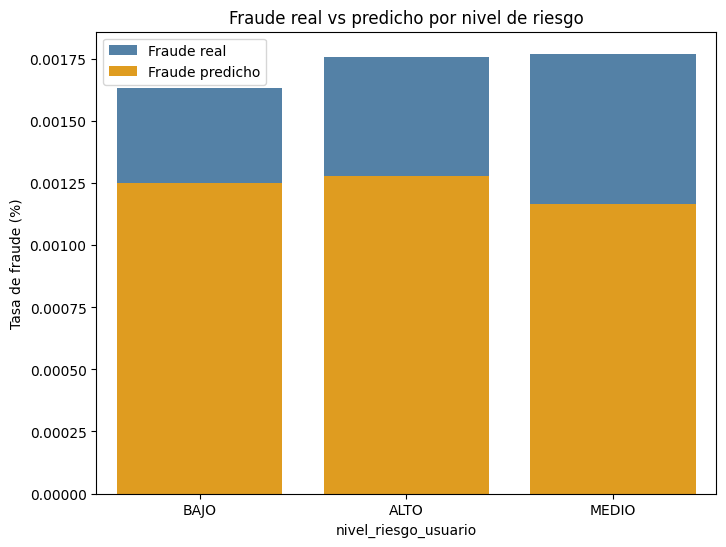

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    data=gold_pdf,
    x="nivel_riesgo_usuario",
    y="Class",
    ci=None,
    color="steelblue",
    label="Fraude real"
)

sns.barplot(
    data=gold_pdf,
    x="nivel_riesgo_usuario",
    y="prediction",
    ci=None,
    color="orange",
    label="Fraude predicho"
)

plt.title("Fraude real vs predicho por nivel de riesgo")
plt.ylabel("Tasa de fraude (%)")
plt.legend()
plt.show()


### 3) Heatmap (matriz de confusión)

Primero armamos la matriz:

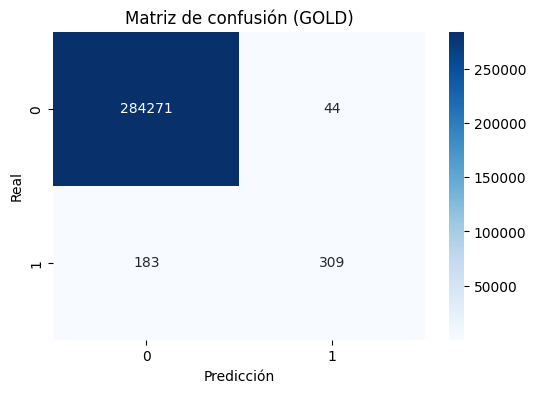

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(gold_pdf["Class"], gold_pdf["prediction"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (GOLD)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


### 📈 4) Curva ROC nuevamente usando GOLD

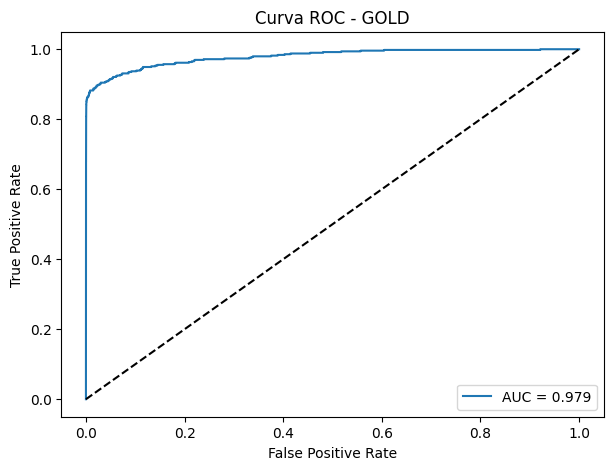

In [0]:
from sklearn.metrics import roc_curve, auc

probs = gold_pdf["probability"].apply(lambda x: x[1])  # prob de fraude
fpr, tpr, _ = roc_curve(gold_pdf["Class"], probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - GOLD")
plt.legend()
plt.show()


### 📊 5) Distribución del monto para transacciones fraudulentas

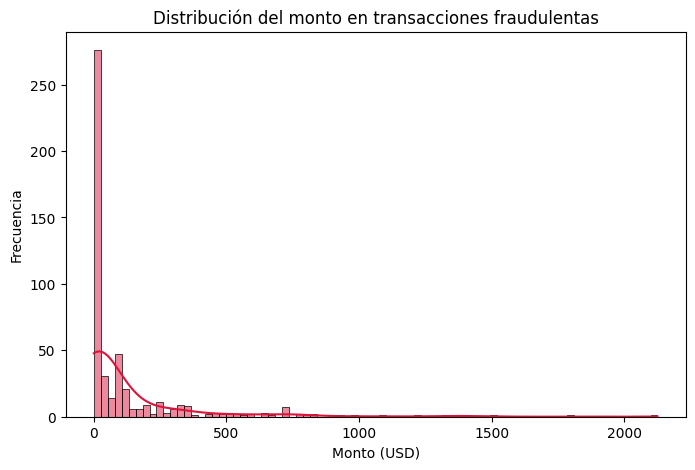

In [0]:
plt.figure(figsize=(8,5))
sns.histplot(
    gold_pdf[gold_pdf["Class"] == 1]["Amount"],
    kde=True,
    color="crimson"
)
plt.title("Distribución del monto en transacciones fraudulentas")
plt.xlabel("Monto (USD)")
plt.ylabel("Frecuencia")
plt.show()


### 📊 6) Top 10 usuarios con mayor probabilidad de fraude

/home/spark-bb2d38be-a8ee-4605-894e-82/.ipykernel/1587/command-7739596268710236-3570529593:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="prob_fraude", y="usuario_id", palette="rocket")


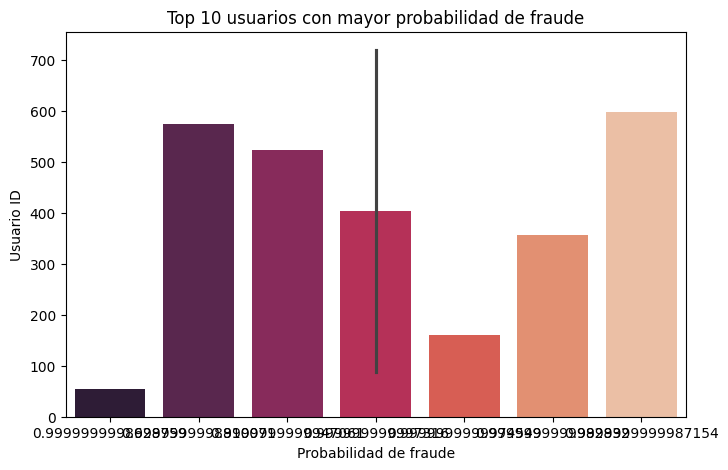

In [0]:
gold_pdf["prob_fraude"] = gold_pdf["probability"].apply(lambda x: x[1])
top10 = gold_pdf.sort_values("prob_fraude", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top10, x="prob_fraude", y="usuario_id", palette="rocket")
plt.title("Top 10 usuarios con mayor probabilidad de fraude")
plt.xlabel("Probabilidad de fraude")
plt.ylabel("Usuario ID")
plt.show()


### 📊 7) Correlación entre variables de usuario y fraude

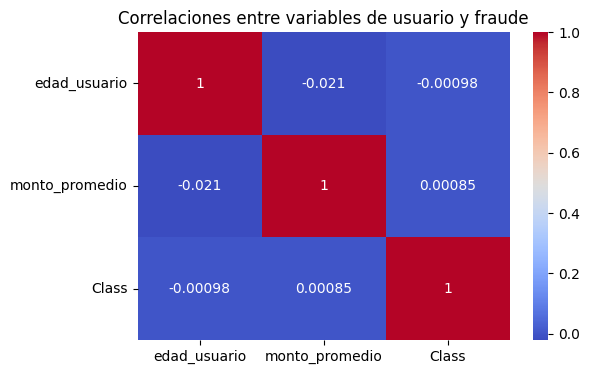

In [0]:
corr_data = gold_pdf[["edad_usuario", "monto_promedio", "Class"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_data, annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables de usuario y fraude")
plt.show()
